In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

*Задаём основные параметры*

In [9]:
a = 0.     # левая граница
b = 1.     # правая граница
n_x = 35   # количество узлов по оси x
n_y = 35   # количество узлов по оси y
h_x = (b-a)/(n_x - 1)   # шаг по оси x
h_y = (b-a)/(n_y - 1)   # шаг по оси y

In [10]:
P = np.zeros((n_x, n_y))   # начальное состояние 

*Граничные условия*

In [11]:
P[:,0] = 0.      # на левой границе давление P = 0
P[0,:] = 150.    # на верхней границе давление P = 0
P[-1,:] = 150.   # на нижней границе давление P = 0
P[:,-1] = 200.   # давлени на правой границе P = 200

*Отобразим график начального состояния*

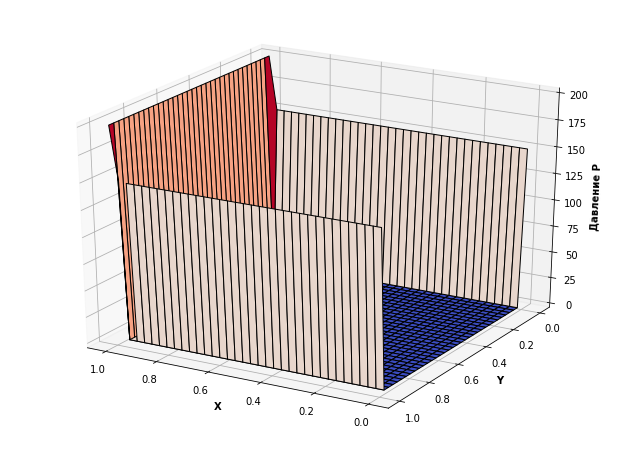

In [12]:
fig = plt.figure(figsize = (11,8))
ax = fig.gca(projection='3d')

X = np.linspace(a, b, n_x)
Y = np.linspace(a, b, n_y)
X, Y = np.meshgrid(X, Y)


surf = ax.plot_surface(X, Y, P[:], cmap=cm.coolwarm, edgecolor = 'black')
ax.set_xlabel('X', fontweight = 'bold')
ax.set_ylabel('Y', fontweight = 'bold')
ax.set_zlabel('Давление P', fontweight = 'bold')
ax.view_init(25, 120)

**L1_norm** определяет насколько близко матрица **P** должна быть в двух последовательных итерациях, прежде чем цикл прервётся. Мы запускаем цикл, копируем матрицу **P** в матрицу **P_n**, а после считаем новую матрицу **P**. Далее матрица, посчитанная на новом цикле, сравнивается с матрицей, посчитанной на предыдущем цикле и пока **L1_norm** больше желаемого **L1_target** продолжаем пробегать цикл.

In [13]:
L1_target = 1e-4            
L1_norm = 1.                
 
P_n = np.empty_like(P)      # создаём матрицу такого же размера как P
    
while L1_norm > L1_target:
    P_n = P.copy()
    P[1:-1, 1:-1] = ((h_y**2 * (P_n[1:-1, 2:] + P_n[1:-1, 0:-2]) +
                         h_x**2 * (P_n[2:, 1:-1] + P_n[0:-2, 1:-1])) /
                        (2 * (h_x**2 + h_y**2)))
       
    L1_norm = (np.sum(np.abs(P[:]) - np.abs(P_n[:])) /
                np.sum(np.abs(P_n[:])))
    
#Ниже приводится справка по тому, что такое P[1:-1, 1:-1], P_n[1:-1, 2:] и так далее

*График равновесного состояния*

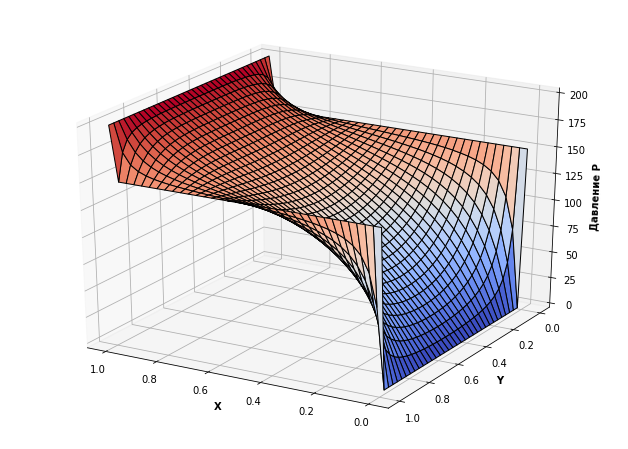

In [14]:
fig = plt.figure(figsize = (11,8))
ax = fig.gca(projection='3d')

X = np.linspace(a, b, n_x)
Y = np.linspace(a, b, n_y)
X, Y = np.meshgrid(X, Y)


surf = ax.plot_surface(X, Y, P[:], cmap=cm.coolwarm, edgecolor = 'black')
ax.set_xlabel('X', fontweight = 'bold')
ax.set_ylabel('Y', fontweight = 'bold')
ax.set_zlabel('Давление P', fontweight = 'bold')
ax.view_init(25, 120)

*Справка*

In [24]:
v = np.array([1,2,3])
c = v.copy()
c

array([1, 2, 3])

In [25]:
s = np.array([[1.2,2,3,81,0],[0,0,0,11,4],[4,3,2,0,0],[5,6,7,8,3],[0,3,5,5,7]])
s

array([[ 1.2,  2. ,  3. , 81. ,  0. ],
       [ 0. ,  0. ,  0. , 11. ,  4. ],
       [ 4. ,  3. ,  2. ,  0. ,  0. ],
       [ 5. ,  6. ,  7. ,  8. ,  3. ],
       [ 0. ,  3. ,  5. ,  5. ,  7. ]])

In [26]:
s[1:-1, 2:]

array([[ 0., 11.,  4.],
       [ 2.,  0.,  0.],
       [ 7.,  8.,  3.]])

In [27]:
s[1:-1, :-2]

array([[0., 0., 0.],
       [4., 3., 2.],
       [5., 6., 7.]])

In [28]:
s[2:, 1:-1]

array([[3., 2., 0.],
       [6., 7., 8.],
       [3., 5., 5.]])

In [29]:
s[0:-2, 1:-1]

array([[ 2.,  3., 81.],
       [ 0.,  0., 11.],
       [ 3.,  2.,  0.]])

In [30]:
s[:,0]

array([1.2, 0. , 4. , 5. , 0. ])

In [31]:
s[0,:]

array([ 1.2,  2. ,  3. , 81. ,  0. ])

In [32]:
s[-1,:]

array([0., 3., 5., 5., 7.])

In [33]:
s[:,-1]

array([0., 4., 0., 3., 7.])

In [34]:
s[1:-1, 1:-1]

array([[ 0.,  0., 11.],
       [ 3.,  2.,  0.],
       [ 6.,  7.,  8.]])